## Fixed biogeography no competition - updated parameter file

#### Libraries etc. 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
import functions_py.fates_xarray_functions as fa

#### Load FATES

In [2]:
fates_history_file_fbnc = '/compyfs/need138/elm_runs/fixed_biog_nocomp_JH.Ec63cce2-F600f74b.2022-10-17/run/lnd/hist/fixed_biog_nocomp_JH.Ec63cce2-F600f74b.2022-10-17.elm.h0.fullrun.nc'

fates_history_fin_fbnc = xr.open_dataset(fates_history_file_fbnc,  decode_times=False)

### use the last 5 years
nyears = int(len(fates_history_fin_fbnc.variables['time'])/12)
tave_start_fbnc = (nyears-5)*12
tave_stop_fbnc  = nyears*12

#### Total biomass by PFT

''

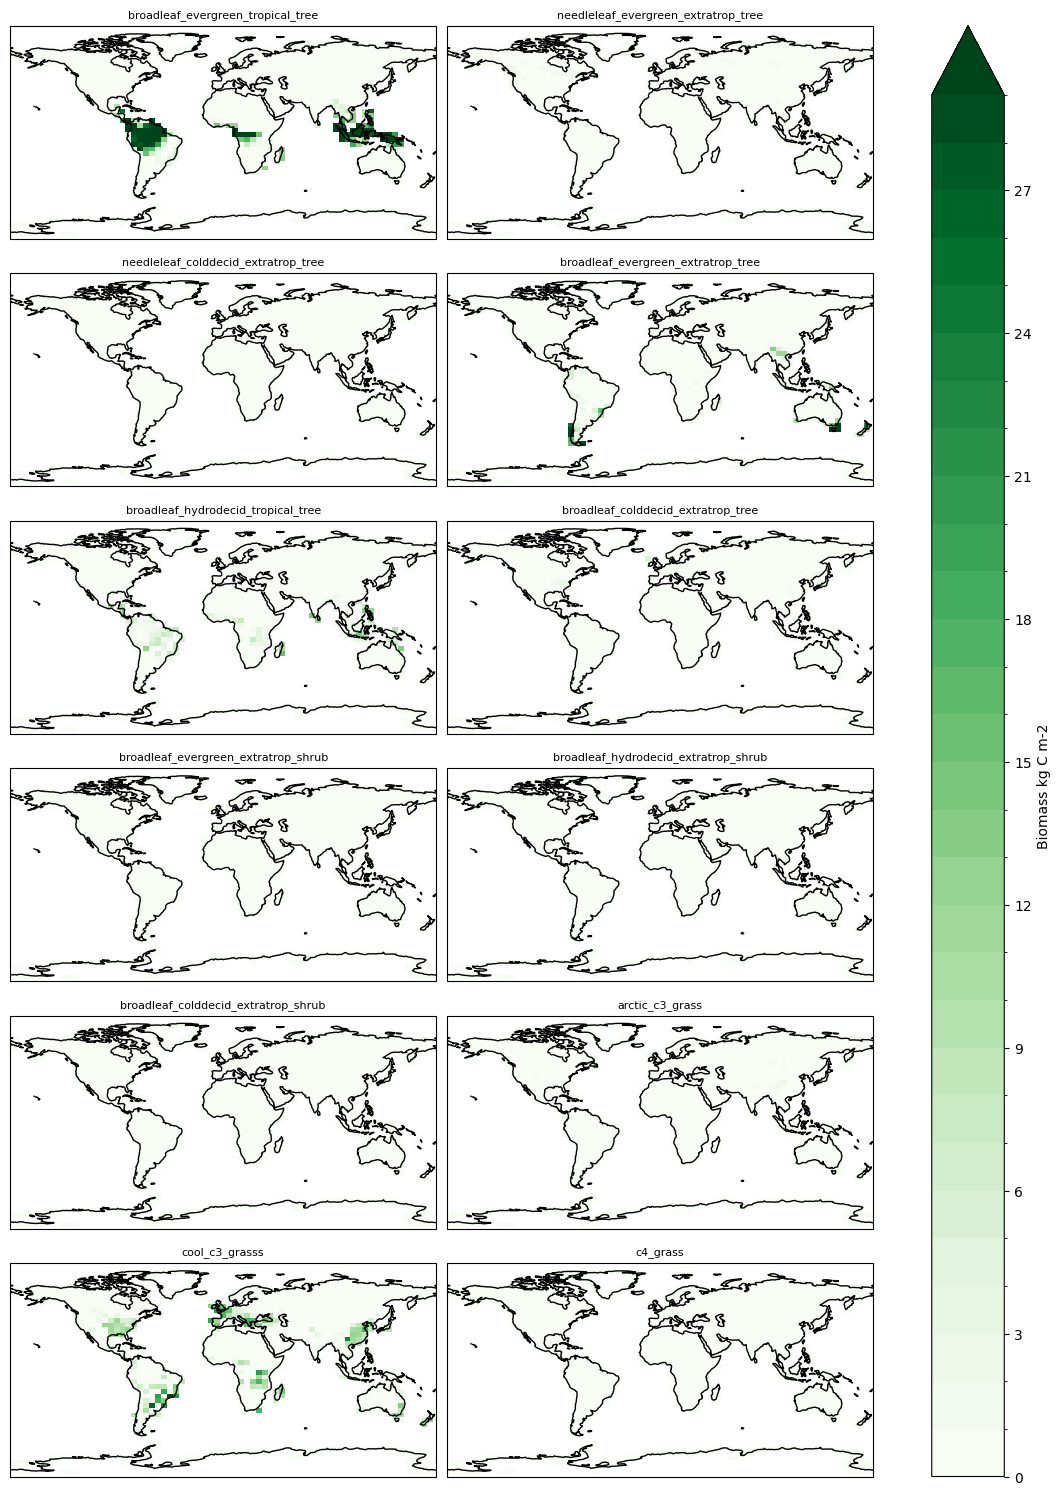

In [3]:
pfts = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']

fbnc = fates_history_fin_fbnc.FATES_VEGC_PF.isel(time=slice(tave_start_fbnc,tave_stop_fbnc)).mean(dim='time') 


g = fbnc.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "Biomass kg C m-2"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,30,1), cmap='Greens',
            facecolor="white")


for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)

[ax.coastlines() for ax in g.axes.flatten()]


plt.savefig("Fixedbiogeognocomp_VEGC.png", format = 'png', dpi = 300, facecolor='white', edgecolor='white')

;

#### Canopy crown area by PFT

''

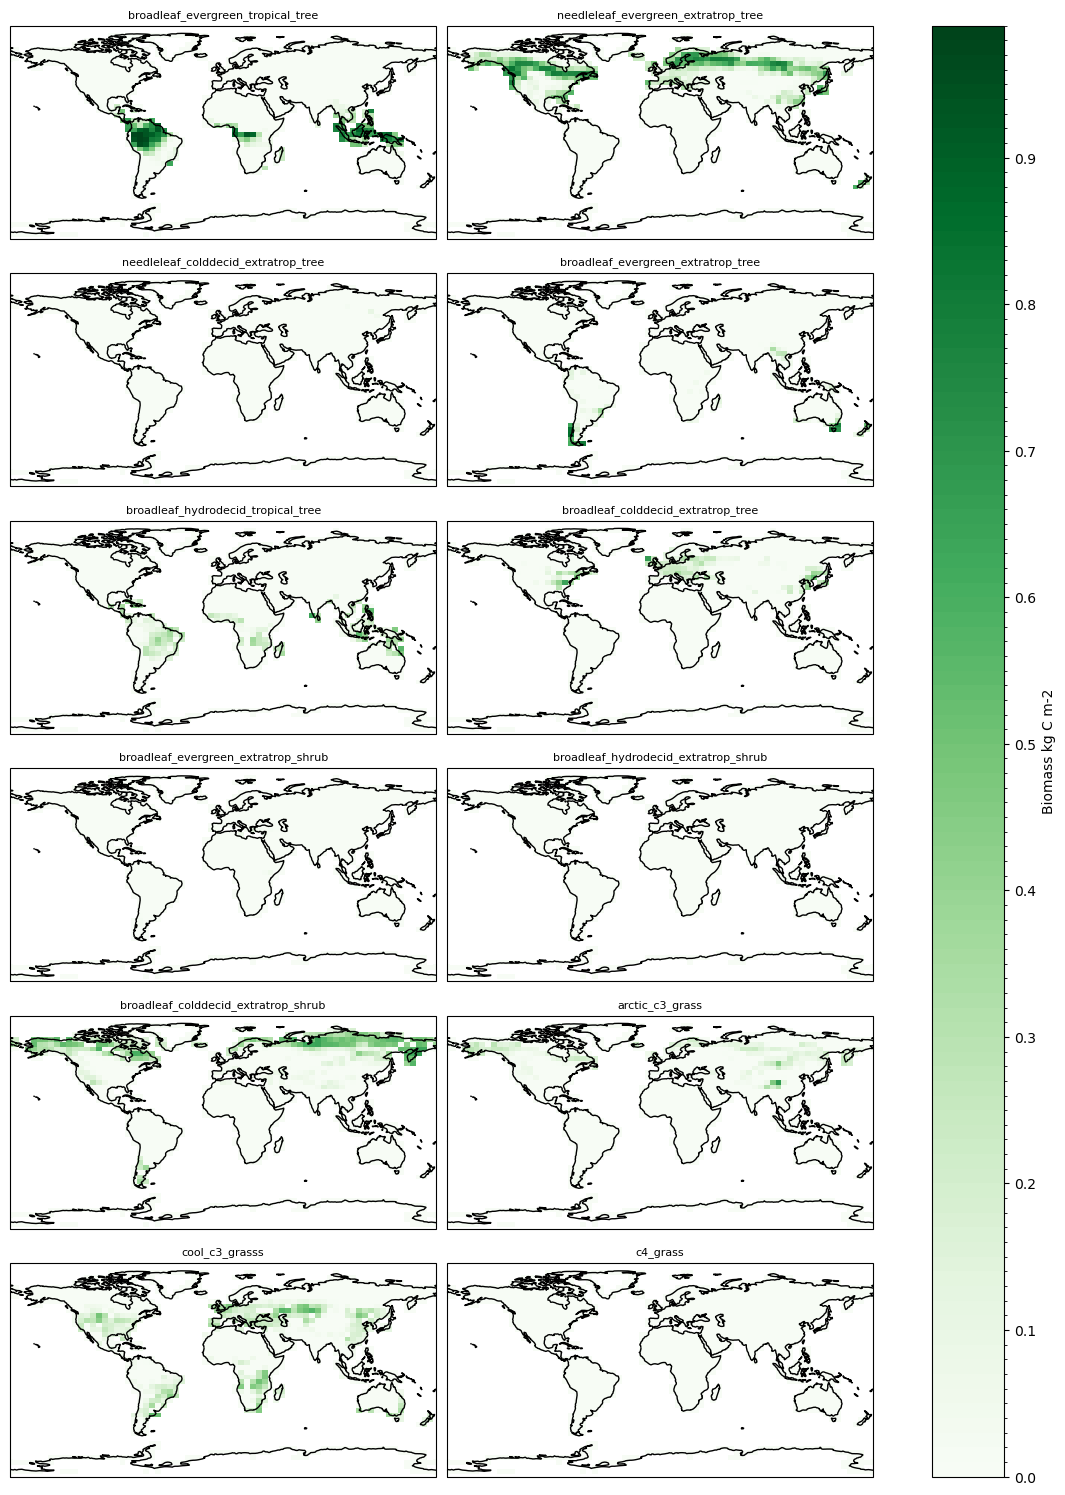

In [4]:
fbnc = fates_history_fin_fbnc.FATES_CANOPYCROWNAREA_PF.isel(time=slice(tave_start_fbnc,tave_stop_fbnc)).mean(dim='time') 


g = fbnc.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "m2 m-2"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,1,0.01), cmap='Greens',
            facecolor="white")


for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)

[ax.coastlines() for ax in g.axes.flatten()]


plt.savefig("Fixedbiogeognocomp_CANOPY_CROWNAREA_PF.png", format = 'png', dpi = 300, facecolor='white', edgecolor='white')

;

#### Leaf biomass by PFT

''

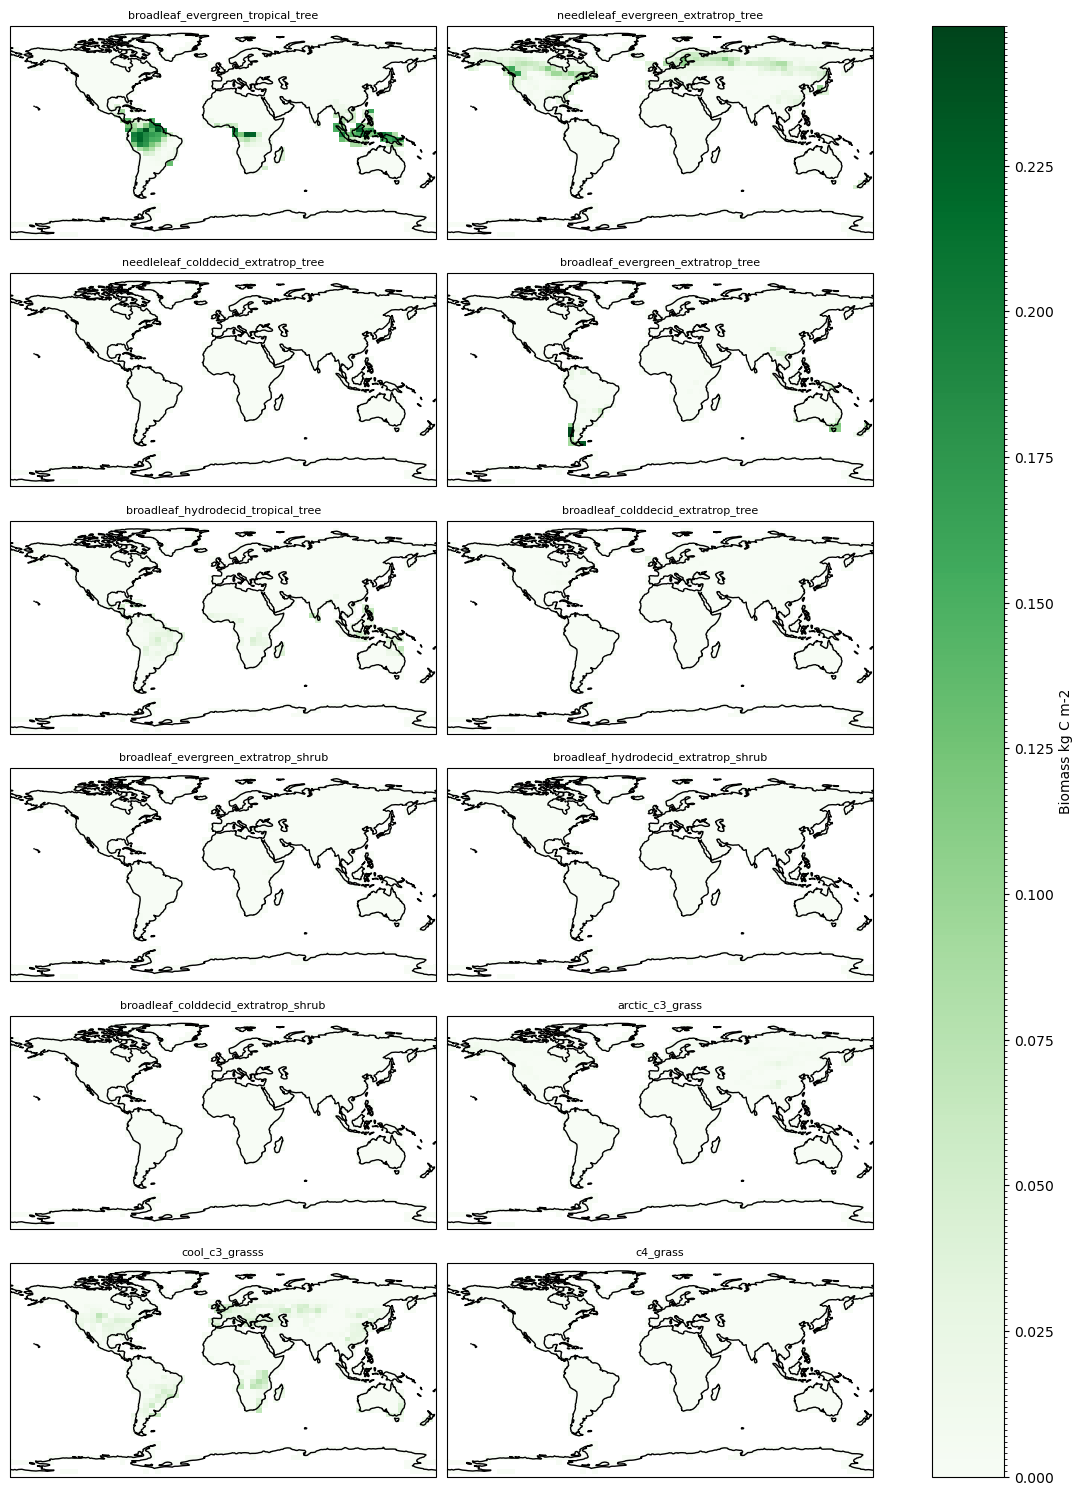

In [5]:
fbnc = fates_history_fin_fbnc.FATES_LEAFC_PF.isel(time=slice(tave_start_fbnc,tave_stop_fbnc)).mean(dim='time') 


g = fbnc.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "Leaf Biomass kg C m-2"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,0.25,0.001), cmap='Greens',
            facecolor="white")


for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)

[ax.coastlines() for ax in g.axes.flatten()]


plt.savefig("Fixedbiogeognocomp_LEAFC.png", format = 'png', dpi = 300, facecolor='white', edgecolor='white')

;

#### LAI by PFT - sorry forgot to add these outputs to history and they are off by default 

In [6]:
# szpf to size by pft
lai_sz_by_pft = fa.scpf_to_scls_by_pft(fates_history_fin_fbnc.FATES_LAI_CANOPY_SZPF, fates_history_fin_fbnc)
# sum over sizes
lai_pft = lai_sz_by_pft.sum(dim='fates_levscls')
# last five years
lai_pft_tmean = lai_pft.isel(time=slice(tave_start_fbnc,tave_stop_fbnc)).mean(dim='time') 

g = lai_pft_tmean.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "LAI m2 m-2"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,3,0.1), cmap='Greens',
            facecolor="white")
for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=8)
[ax.coastlines() for ax in g.axes.flatten()]

;

AttributeError: 'Dataset' object has no attribute 'FATES_LAI_CANOPY_SZPF'